## Malaria Detection using Convolutional Neural Networks

In [1]:
# import the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
from keras.models import load_model

### Load the dataset

In [2]:
labels = ['parasite', 'normal']
img_size = 150
def fetch(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

### Get the train and test dataset

In [3]:
train = fetch('dataset/train')
test = fetch('dataset/test')

/tmp/ipykernel_3296/1258985663.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


### See Malaria Data

In [4]:
malaria_infected = os.listdir('dataset/train/parasite')
malaria_dir = 'dataset/train/parasite'

In [5]:
normal = os.listdir('dataset/test/normal')
normal_dir = 'dataset/test/normal'

### Visualize the image

- Infected Image

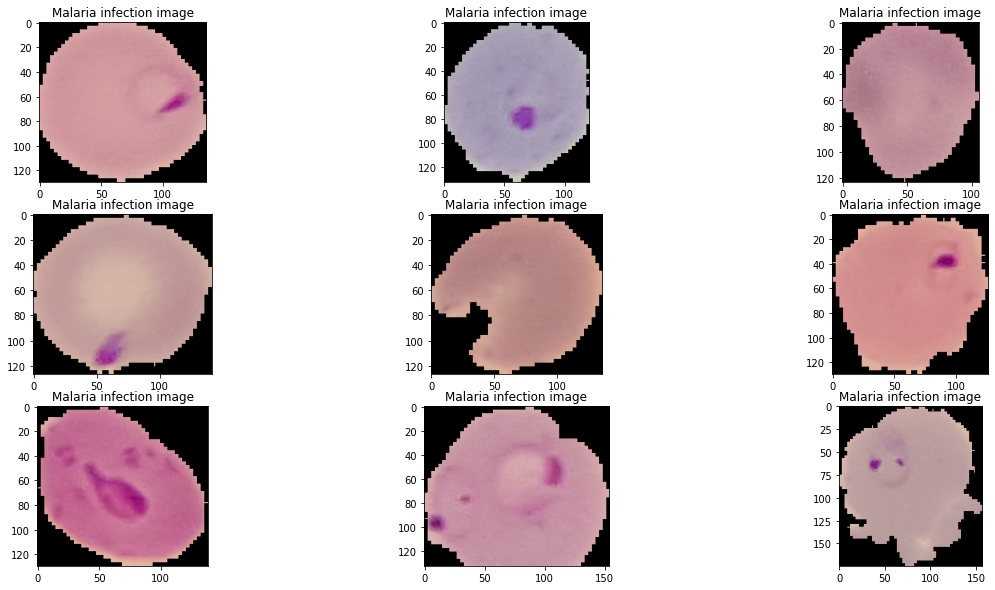

In [6]:
plt.figure(figsize = (20,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(malaria_dir, malaria_infected[i]))
    plt.imshow(img, cmap='gray')
    plt.title('Malaria infection image')
plt.show()

- Normal Image

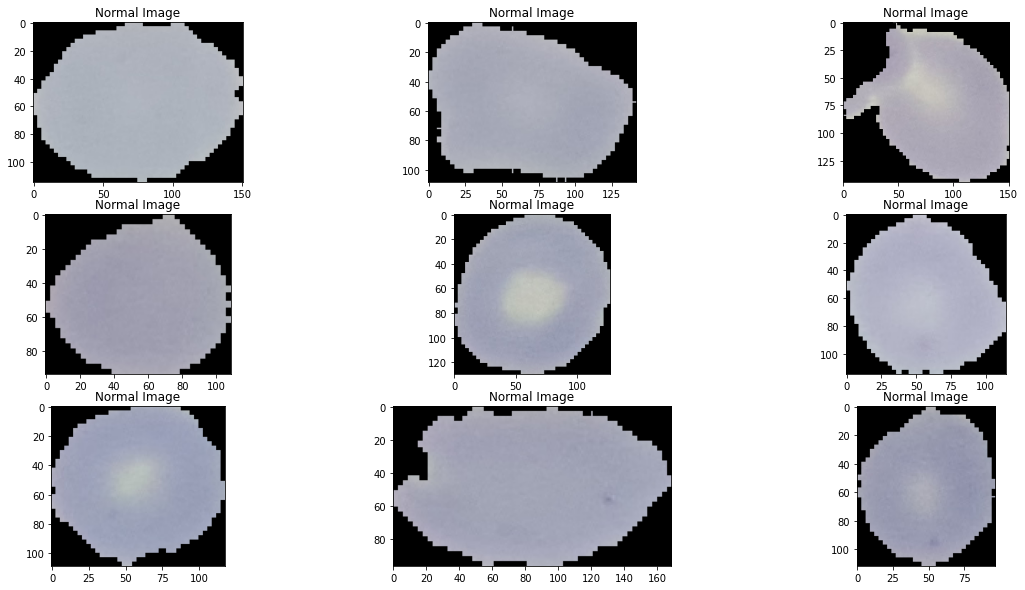

In [7]:
plt.figure(figsize = (20,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.title('Normal Image')
plt.show()

### Closer look to both normal and infected

### Malaria Infected

Text(0.5, 1.0, 'parasite')

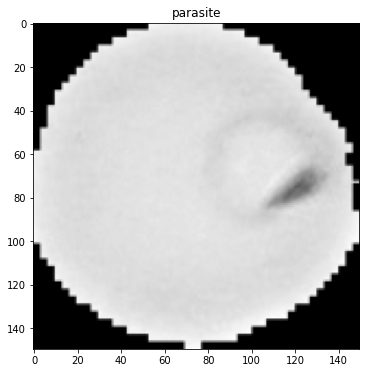

In [8]:
plt.figure(figsize = (6,6))
plt.imshow(train[0][0],cmap='gray')
plt.title(labels[train[0][1]])

### Normal

Text(0.5, 1.0, 'normal')

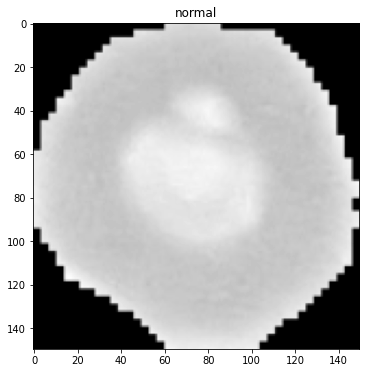

In [9]:
plt.figure(figsize = (6,6))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

### Count plot of the individual datapoints

/home/nix-code/virtualenv/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

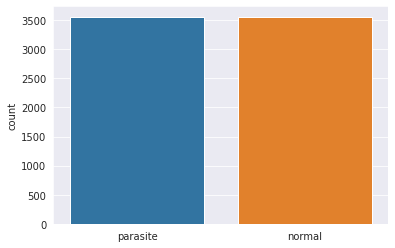

In [10]:
counter = []
for i in train:
    if (i[1] == 0):
        counter.append('parasite')
    else:
        counter.append('normal')
sns.set_style('darkgrid')
sns.countplot(counter)

### Preprocessing the data

In [11]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)
    
for feature, label in test:
    x_test.append(feature)
    y_test.append(label)


### Normalization of the data

In [12]:
x_train = np.array(x_train)/255
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test = np.array(x_test)/255
x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

### Training with CNN

In [13]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

2022-01-15 21:43:44.934338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 21:43:45.038350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 21:43:45.038862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 21:43:45.040623: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [14]:
rate_reduction = ReduceLROnPlateau(monitor='accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


In [15]:
history = model.fit(x_train,y_train, batch_size = 32 ,epochs = 16 ,callbacks = [rate_reduction])

2022-01-15 21:43:47.318482: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 640620000 exceeds 10% of free system memory.
2022-01-15 21:43:48.012698: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 640620000 exceeds 10% of free system memory.


Epoch 1/16


2022-01-15 21:43:51.566060: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101


223/223 [==============================] - 24s 80ms/step - loss: 0.8009 - accuracy: 0.6652 - lr: 0.0010
Epoch 2/16
223/223 [==============================] - 17s 77ms/step - loss: 0.2499 - accuracy: 0.9192 - lr: 0.0010
Epoch 3/16
223/223 [==============================] - 17s 77ms/step - loss: 0.2136 - accuracy: 0.9340 - lr: 0.0010
Epoch 4/16
223/223 [==============================] - 17s 77ms/step - loss: 0.1985 - accuracy: 0.9378 - lr: 0.0010
Epoch 5/16
223/223 [==============================] - 17s 78ms/step - loss: 0.1862 - accuracy: 0.9403 - lr: 0.0010
Epoch 6/16
223/223 [==============================] - 17s 77ms/step - loss: 0.1669 - accuracy: 0.9444 - lr: 0.0010
Epoch 7/16
223/223 [==============================] - 17s 78ms/step - loss: 0.1730 - accuracy: 0.9437 - lr: 0.0010
Epoch 8/16
223/223 [==============================] - 17s 77ms/step - loss: 0.1567 - accuracy: 0.9477 - lr: 0.0010
Epoch 9/16
223/223 [==============================] - 18s 82ms/step - loss: 0.1464 - accura

### Loss and the accuracy

In [16]:
score = model.evaluate(x_train, y_train, verbose = 0) 
print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

2022-01-15 21:48:40.259319: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 640620000 exceeds 10% of free system memory.
2022-01-15 21:48:41.522122: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 640620000 exceeds 10% of free system memory.


Train loss: 0.08076188713312149
Train accuracy: 0.9675470590591431


In [18]:
score = model.evaluate(x_test, y_test, verbose = 0) 
print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

Train loss: 0.3220715820789337
Train accuracy: 0.9262499809265137


### Visualization of loss and accuracy

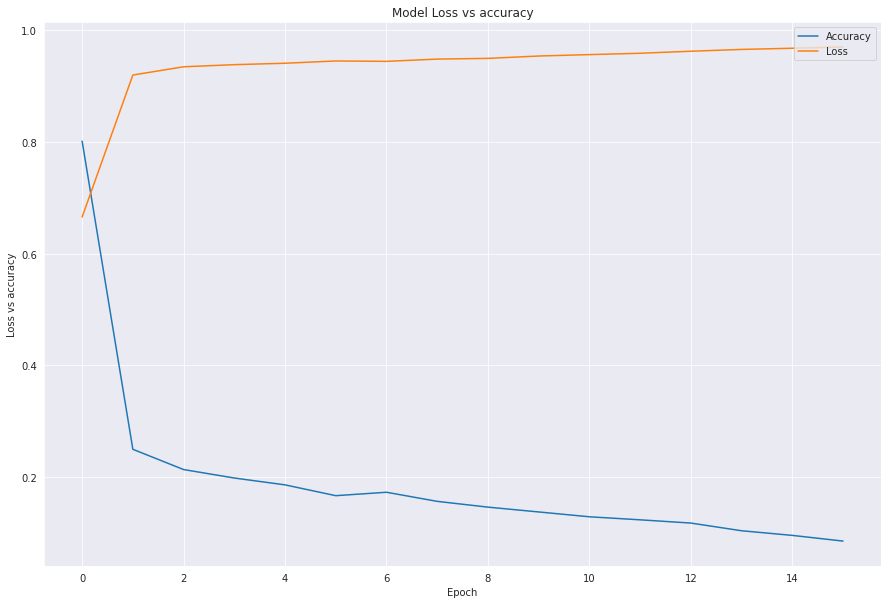

In [19]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss vs accuracy')
plt.ylabel('Loss vs accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.show()

### Model Prediction and analysis

In [20]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred).astype(int).reshape(-1)


### Classification report

In [22]:
print(classification_report(y_test, y_pred, target_names = ['Infected','Normal']))

              precision    recall  f1-score   support

    Infected       0.99      0.86      0.92      1600
      Normal       0.88      0.99      0.93      1600

    accuracy                           0.93      3200
   macro avg       0.93      0.93      0.93      3200
weighted avg       0.93      0.93      0.93      3200



### Confusion matrix

In [23]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1378,  222],
       [  14, 1586]])

In [24]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<AxesSubplot:>

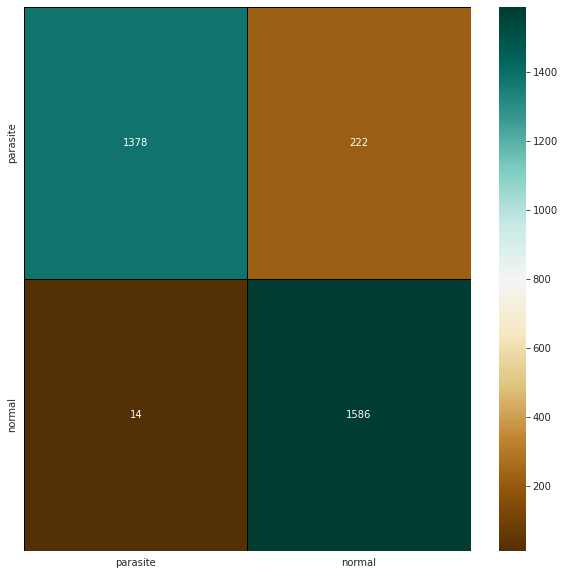

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "BrBG", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [27]:
correct = np.nonzero(y_pred == y_test)[0]
incorrect = np.nonzero(y_pred != y_test)[0]

### Correctly predicted

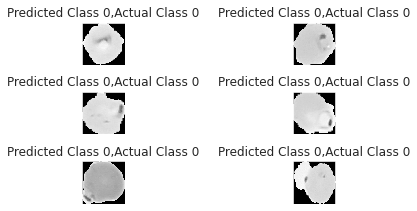

In [28]:
i = 0
for c in correct[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

### Incorrect Prediction

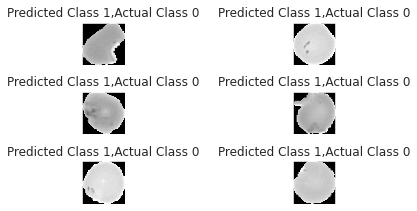

In [29]:
i = 0
for c in incorrect[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred[c], y_test[c]))
    plt.tight_layout()
    i += 1